In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import os
from datetime import datetime, timedelta

from rakott.mpl import savefig_bbox

def int_to_dt(t):
    return pd.to_datetime(start_date) + timedelta(days=t)
def dt_to_days(t):
    return (t - datetime(2020, 1, 1)).days
def str_to_dt(t):
    return datetime.strptime(t, '%b %d %Y')

date_range = [datetime(2020, 3, 1) + timedelta(weeks=i) for i in range(5)]
date_formatter = mpl.dates.DateFormatter('%b %d')

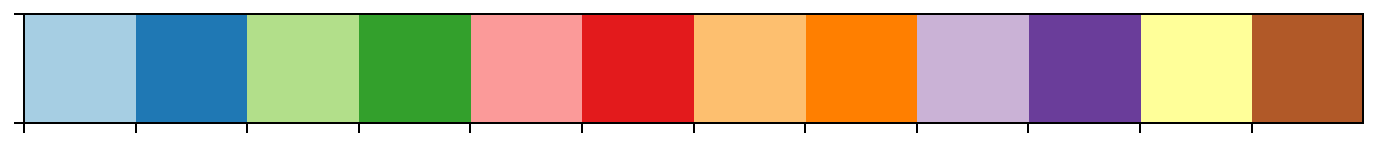

In [2]:
colors = sns.color_palette('Paired')
sns.palplot(colors)

In [3]:
official = pd.read_csv('../data/NPI_dates.csv').sort_values('Country', ascending=False)
official['First'] = [str_to_dt(t) for t in official['First']]
official['Last'] = [str_to_dt(t) for t in official['Last']]
official['First (days)'] = [dt_to_days(t) for t in official['First']]
official['Last (days)'] = [dt_to_days(t) for t in official['Last']]
official.head()

,Country,First,Last,First (days),Last (days)
11,Wuhan,2020-01-23,2020-01-23,22,22
10,United Kingdom,2020-03-16,2020-03-24,75,83
9,Switzerland,2020-03-13,2020-03-20,72,79
8,Sweden,2020-03-12,2020-03-18,71,77
7,Spain,2020-03-09,2020-03-14,68,73


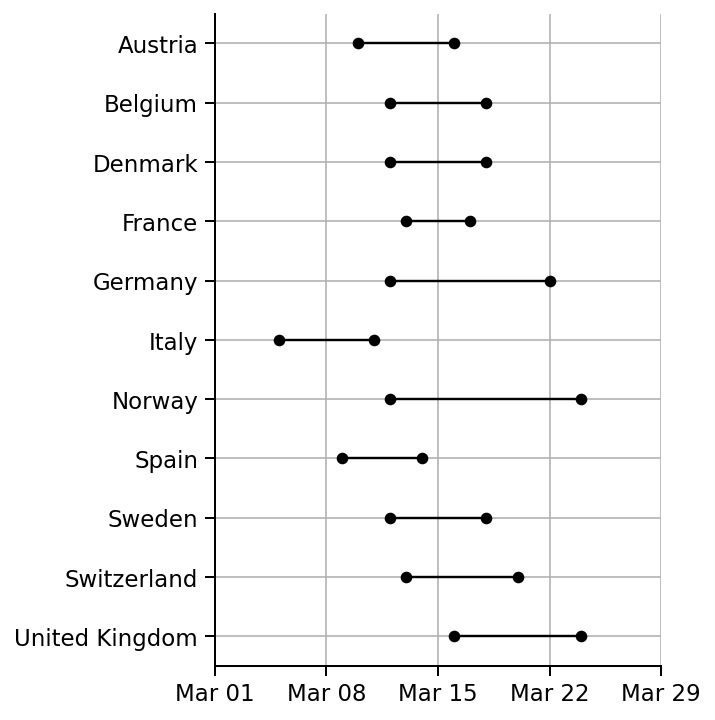

In [67]:
fig, ax = plt.subplots(figsize=(4, 6))
data_ = official[official['First'] >= datetime(2020, 3, 1)]
ax.plot('First', 'Country', 'ok', data=data_)
ax.plot('Last', 'Country', 'ok', data=data_)
ax.hlines('Country', 'First', 'Last', data=data_)
ax.set_xticks(date_range)
ax.xaxis.set_major_formatter(date_formatter)
ax.grid(True)
txt = ax.get_yticklabels()
sns.despine()
fig.savefig('../figures/Fig-NPI_dates.pdf', dpi=100, **savefig_bbox(*txt))

In [4]:
job_id = '2020-05-26-Apr11'
output_folder = r'../output/{}'.format(job_id)
table_path = os.path.join(output_folder, 'tables', 'all-countries-{}.csv'.format(job_id))
df = pd.read_csv(table_path)
df = df.rename(columns={'official_τ': 'τ official'})
df['country'] = df['country'].str.replace("_", " ")
df.head()

,country,WAIC,DIC using median,DIC using mean,DIC using MAP,loglik(MAP),loglik(mean),loglik(median),N,p_steps,...,E0 MAP,Iu0 mean,Iu0 median,Iu0 MAP,Δt0 mean,Δt0 median,Δt0 MAP,τ mean.1,τ median.1,τ MAP.1
0,Sweden,31.0665,-1639.4325,-1519.5816,33.1405,-11.0705,-787.4315,-847.3570,10183175,1000000,...,45.8016,760.8054,543.5448,62.8275,2.7186,2.3755,1.5389,17.3031,16.6742,20.4835
1,Belgium,215.9987,-428.4010,-3596.8006,60.3652,-15.6732,-1844.2561,-260.0563,11422068,1000000,...,94.9026,655.5447,426.9644,224.3348,2.5066,2.1756,1.4842,29.2992,30.2288,32.1712
2,United Kingdom,446.9603,-284.1251,-9230.9182,86.0777,-28.5914,-4687.0894,-213.6928,66488991,1000000,...,201.0745,785.4792,486.0467,661.8047,2.4068,2.0540,1.7261,31.7037,32.5896,33.6824
3,Switzerland,63.8905,-4348.4293,-4427.3198,65.7228,-26.7743,-2273.2956,-2233.8504,8516543,1000000,...,39.7658,618.3113,328.7800,427.1846,2.3850,1.9891,1.2732,27.8759,27.7772,28.1448
4,Wuhan,74.0955,27.0299,-446.6557,74.7881,-31.2646,-291.9865,-55.1437,10607700,1000000,...,1876.1248,812.4173,561.1586,145.9232,2.6653,2.4248,1.3131,22.8258,23.0121,23.5787


In [4]:
print(df.columns)
print(df.shape)

Index(['country', 'DIC using median', 'DIC using mean', 'DIC using MAP',
       'loglik(MAP)', 'loglik(mean)', 'loglik(median)', 'N', 'p_steps',
       'p_model_type', 'p_Td1', 'p_Td2', 'τ official', 'τ mean', 'τ median',
       'τ MAP', 'official τ from 1 Jan', 'τ mean from 1 Jan',
       'τ median from 1 Jan', 'τ MAP from 1 Jan', 'τ CI median (75%)',
       'τ CI median (95%)', 'τ CI mean (75%)', 'τ CI mean (95%)', 'Z mean',
       'Z median', 'Z MAP', 'D mean', 'D median', 'D MAP', 'μ mean',
       'μ median', 'μ MAP', 'β mean', 'β median', 'β MAP', 'α1 mean',
       'α1 median', 'α1 MAP', 'λ mean', 'λ median', 'λ MAP', 'α2 mean',
       'α2 median', 'α2 MAP', 'E0 mean', 'E0 median', 'E0 MAP', 'Iu0 mean',
       'Iu0 median', 'Iu0 MAP', 'Δt0 mean', 'Δt0 median', 'Δt0 MAP',
       'τ mean.1', 'τ median.1', 'τ MAP.1'],
      dtype='object')
(12, 57)


In [5]:
countries = df['country'].unique()
country_color = {country: colors[i] for i, country in enumerate(countries)}
df['color'] = [country_color[country] for country in df['country']]

In [6]:
def date_to_int(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    td = dt - datetime(2020, 1, 1)
    return td.days
def date_to_date(x):
    dt = datetime.strptime(x + ' 2020', '%b %d %Y')
    return dt

df['τ mean days'] = [date_to_int(x) for x in df['τ mean']]
df['τ median days'] = [date_to_int(x) for x in df['τ median']]
df['τ MAP days'] = [date_to_int(x) for x in df['τ MAP']]
df['τ official days'] = [date_to_int(x) for x in df['τ official']]
df['τ official - mean days'] = df['τ official days'] - df['τ mean days']
df['τ official - median days'] = df['τ official days'] - df['τ median days']
df['τ official - MAP days'] = df['τ official days'] - df['τ MAP days']
df['τ mean'] = [date_to_date(x) for x in df['τ mean']]
df['τ median'] = [date_to_date(x) for x in df['τ median']]
df['τ MAP'] = [date_to_date(x) for x in df['τ MAP']]
df['τ official'] = [date_to_date(x) for x in df['τ official']]

df.head()

,country,DIC using median,DIC using mean,DIC using MAP,loglik(MAP),loglik(mean),loglik(median),N,p_steps,p_model_type,...,τ median.1,τ MAP.1,color,τ mean days,τ median days,τ MAP days,τ official days,τ official - mean days,τ official - median days,τ official - MAP days
0,Sweden,-258.97,-398.63,30.40,-6.66,-221.17,-151.34,10183175,1000000,2,...,17.0,20.0,"(0.6509803921568628, 0.807843137254902, 0.8901...",68,69,72,77,9,8,5
1,Belgium,1.61,-500.57,32.44,-11.61,-278.12,-27.03,11422068,1000000,2,...,17.0,16.0,"(0.12156862745098039, 0.47058823529411764, 0.7...",74,73,72,77,3,4,5
2,United Kingdom,12.13,-794.52,42.41,-12.84,-431.30,-27.98,66488991,1000000,2,...,24.0,25.0,"(0.6980392156862745, 0.8745098039215686, 0.541...",77,77,78,83,6,6,5
3,Switzerland,-105.13,-996.52,75.81,-29.84,-566.01,-120.31,8516543,1000000,2,...,28.0,29.0,"(0.2, 0.6274509803921569, 0.17254901960784313)",77,79,80,79,2,0,-1
4,Wuhan,27.03,-446.66,74.79,-31.26,-291.99,-55.14,10607700,1000000,2,...,23.0,23.0,"(0.984313725490196, 0.6039215686274509, 0.6)",32,33,33,22,-10,-11,-11


## Compare $\tau$ posterior mean and posterior median

,τ median from 1 Jan,τ mean from 1 Jan
τ median from 1 Jan,1.000000,0.997925
τ mean from 1 Jan,0.997925,1.000000


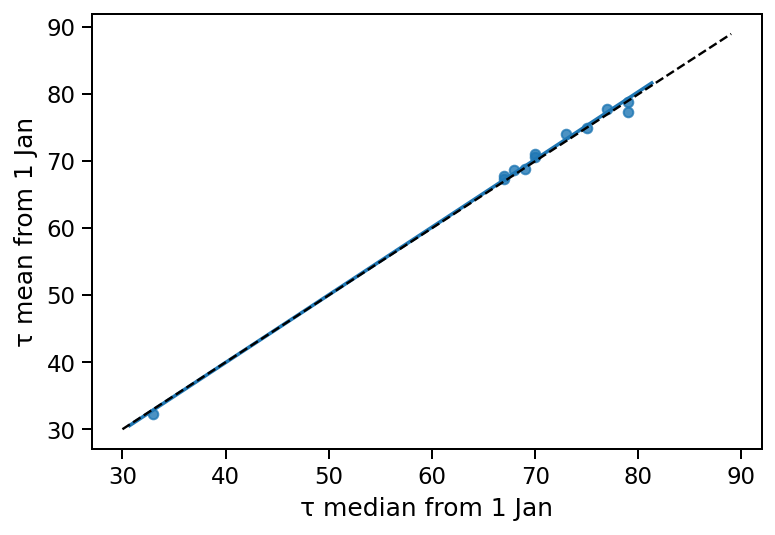

In [7]:
sns.regplot('τ median from 1 Jan', 'τ mean from 1 Jan', data=df, ci=False)
plt.plot(np.arange(30, 90), np.arange(30, 90), ls='--', color='k')


df[['τ median from 1 Jan', 'τ mean from 1 Jan']].corr()

,τ median from 1 Jan,τ MAP from 1 Jan
τ median from 1 Jan,1.000000,0.982845
τ MAP from 1 Jan,0.982845,1.000000


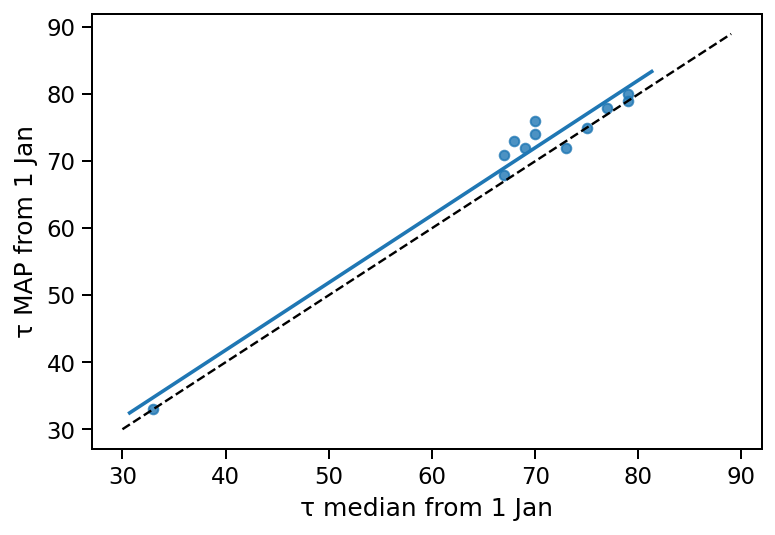

In [8]:
# df.plot.scatter('τ mean days', 'τ median days')
sns.regplot('τ median from 1 Jan', 'τ MAP from 1 Jan', data=df, ci=False)
plt.plot(np.arange(30, 90), np.arange(30, 90), ls='--', color='k')

df[['τ median from 1 Jan', 'τ MAP from 1 Jan']].corr()

# Compare $\tau^*$ and $\hat{\tau}$

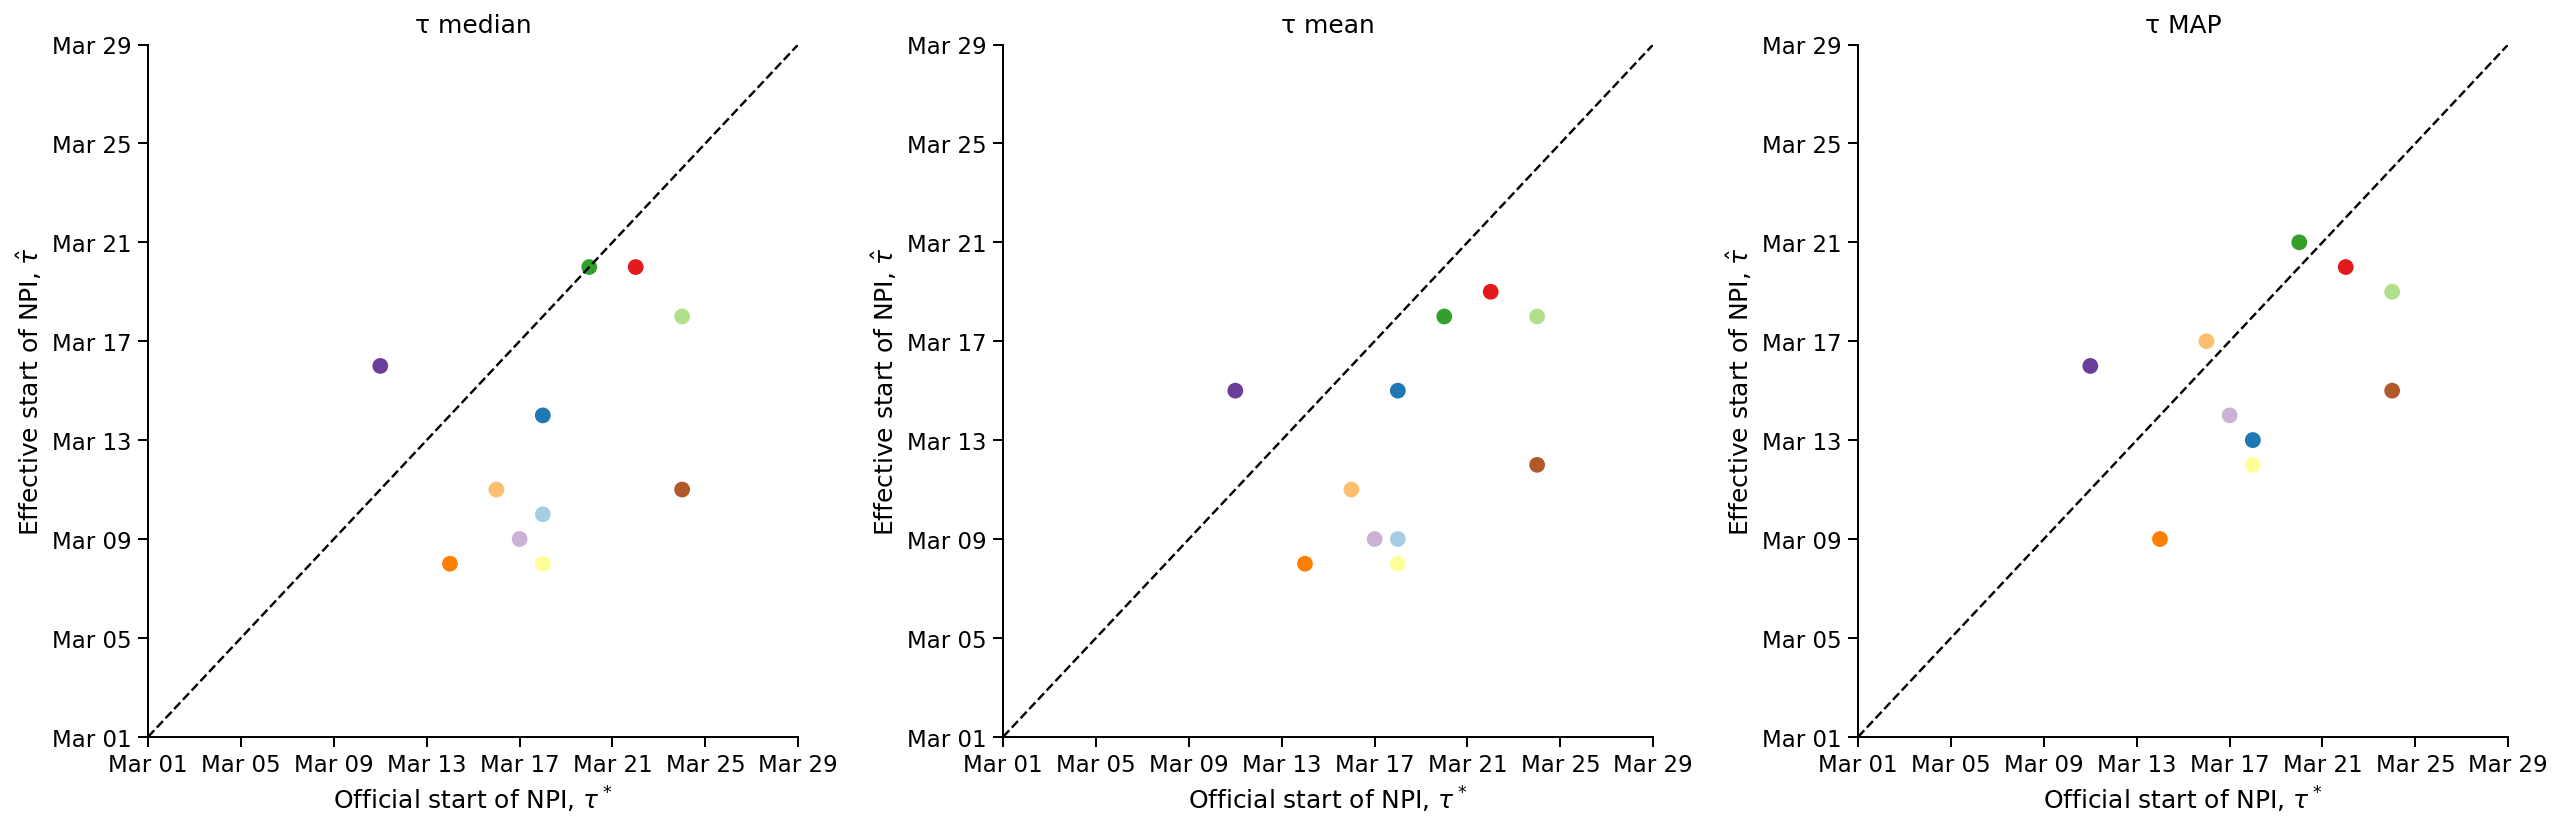

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for feature, ax in zip(['τ median', 'τ mean', 'τ MAP'], axes.flat):
    ax.scatter('τ official', feature, c='color', s=50, data=df)
    ax.plot(date_range, date_range, '--k')
    ax.set(
        title=feature,
        xlabel=r'Official start of NPI, $\tau^*$',
        ylabel=r'Effective start of NPI, $\hat{\tau}$',
        xlim=(min(date_range), max(date_range)),
        ylim=(min(date_range), max(date_range)),
    #     xticks=date_range[::2],
    #     yticks=date_range[::2],
    )
    ax.xaxis.set_major_formatter(date_formatter)
    ax.yaxis.set_major_formatter(date_formatter)
fig.tight_layout()
sns.despine()

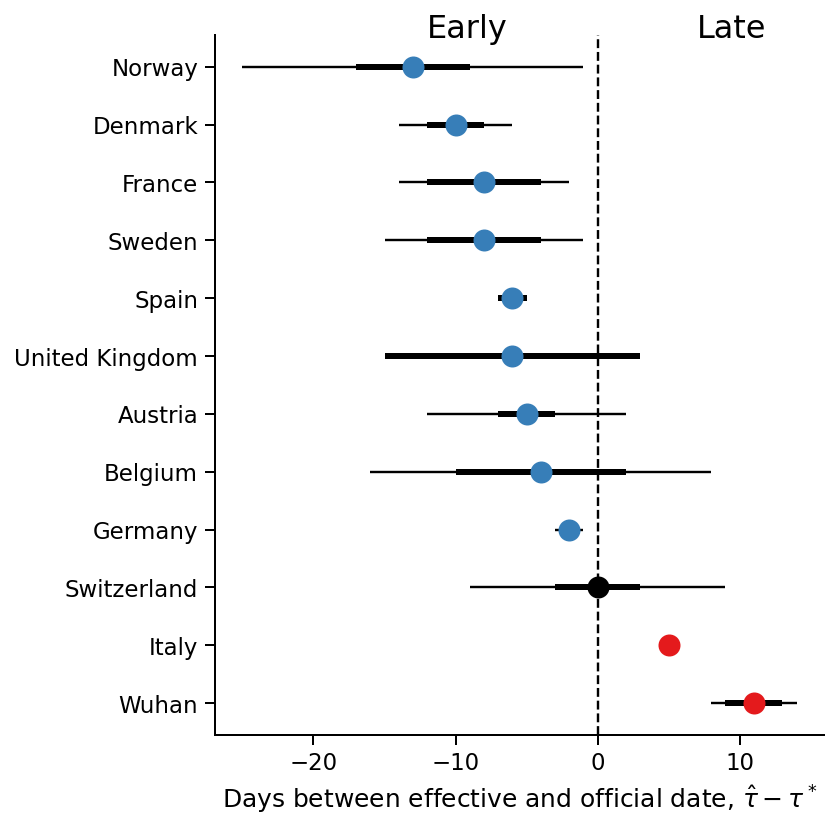

In [13]:
col = 'τ official - median days'
ci75_col = 'τ CI median (75%)'
ci95_col = 'τ CI median (95%)'

fig, ax = plt.subplots(figsize=(6, 6))
df_ = df.sort_values(col)

val = -df_[col]
ci75 = df_[ci75_col]
ci95 = df_[ci95_col]
country = df_['country']
ax.hlines(country, val-ci95, val+ci95)
ax.hlines(country, val-ci75, val+ci75, lw=3)

idx = df_[col] >= 1
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color=blue)


idx = df_[col] <= -1
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color=red)

idx = (-1 < df_[col]) & (df_[col] < 1)
val = -df_.loc[idx, col]
country = df_.loc[idx, 'country']
ax.plot(val, country, 'o', markersize=10, color='k')

plt.axvline(0, ls='--', color='k')
ax.set(
    xlabel=r'Days between effective and official date, $\hat{\tau} - \tau^*$',
)
ax.annotate('Late', (7, 11.5), fontsize=16)
ax.annotate('Early', (-12, 11.5), fontsize=16)
sns.despine()
plt.tight_layout()
# fig.savefig('../figures/Fig1.pdf', dpi=100)

In [ ]:
col = 'τ median days'
ci75_col = 'τ CI median (75%)'
ci95_col = 'τ CI median (95%)'

fig, ax = plt.subplots(figsize=(6, 6))
df_ = df.sort_values(col)
df_ = pd.merge(df_, official, left_on='country', right_on='Country')

val = df_[col]
ci75 = df_[ci75_col]
ci95 = df_[ci95_col]
first = df_['First (days)']
last = df_['Last (days)']
country = df_['country']

kwargs = dict(marker='|', markersize=20, ls='', color='k')
ax.plot(first, country, **kwargs)
ax.plot(last, country, **kwargs)
# ax.hlines(country, first, last)

ax.hlines(country, val-ci95, val+ci95)
ax.hlines(country, val-ci75, val+ci75, lw=3)

kwargs = dict(marker='o', markersize=8, alpha=0.8, ls='')

idx1 = df_[col] > df_['Last (days)'] + 1
val = df_.loc[idx1, col]
country = df_.loc[idx1, 'country']
ax.plot(val, country, color=red, **kwargs)


idx2 = df_[col] < df_['First (days)'] - 1
val = df_.loc[idx2, col]
country = df_.loc[idx2, 'country']
ax.plot(val, country, color=blue, **kwargs)

idx3 = ~(idx1 | idx2)
val = df_.loc[idx3, col]
country = df_.loc[idx3, 'country']
ax.plot(val, country, color='k', **kwargs)

# plt.axvline(0, ls='--', color='k')
ax.set(
    xlabel=r'Days between effective and official date, $\hat{\tau} - \tau^*$',
)
ax.annotate('Late', (7, 11.5), fontsize=16)
ax.annotate('Early', (-12, 11.5), fontsize=16)
sns.despine()
plt.tight_layout()